<a href="https://colab.research.google.com/github/Debasish9333/PRODIGY_ML_05/blob/main/Task5_PRODIGY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ⚠️ **Note for Viewers:**  
> This notebook contains rich HTML outputs or interactive elements (e.g., widgets, charts, or custom visualizations) that may **not display properly on GitHub**.  
> To view the full interactive experience, please open the notebook using one of the following options:
>
> 🔗 [**Google Colab**](https://colab.research.google.com/github/Debasish9333/PRODIGY_ML_05/blob/main/Task5_PRODIGY.ipynb)

1.Setup & Configuration
GPU acceleration enabled

  -TensorFlow/Keras imports

  -Visualization and OS utilities

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import json
import os

2.Data Preparation

-Dataset Download: Food-101 (subset of 10 common food classes)

-Selected Classes: apple_pie, burger, caesar_salad, donuts, fried_rice, ice_cream, pizza, ramen, steak, sushi

-Extraction: Filters only relevant classes during extraction



In [ ]:
!wget -q http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!mkdir -p food-101/images

import tarfile
food_classes = ['apple_pie', 'burger', 'caesar_salad', 'donuts', 'fried_rice',
                'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']
with tarfile.open("food-101.tar.gz") as tar:
    for member in tar.getmembers():
        if any(f"images/{cls}/" in member.name for cls in food_classes):
            tar.extract(member, path=".")


3.Preprocessing Pipeline

-Image Parameters:

-IMG_SIZE = (224, 224) (optimized for MobileNetV2)

-BATCH_SIZE = 32

-Data Augmentation:

-Rescaling, rotation, zoom, horizontal flip

-80/20 train-validation split

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = len(food_classes)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'food-101/images',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    classes=food_classes
)

val_generator = train_datagen.flow_from_directory(
    'food-101/images',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    classes=food_classes
)

Found 7200 images belonging to 10 classes.
Found 1800 images belonging to 10 classes.


4.Model Architecture

-Base Model: MobileNetV2 (pre-trained on ImageNet)

-Frozen weights for transfer learning

-Custom Head:

-Global Average Pooling

-Dense (128 neurons, ReLU)

-Dropout (30%)

-Output layer (softmax for 10 classes)



In [ ]:
with open('class_indices.json', 'w') as f:
    json.dump(train_generator.class_indices, f)

In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


5.Training Configuration

-Optimizer: Adam

-Loss: Categorical crossentropy

-Callbacks:

-Early stopping (patience=3)

-Model checkpoint (saves best weights)



In [ ]:
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('best_food_model.h5', save_best_only=True)
]

6.Training Execution

-10 epochs

-Batch-wise training/validation

-Accuracy/loss tracking



In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6208 - loss: 1.1517

225/225 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.6212 - loss: 1.1504 - val_accuracy: 0.8094 - val_loss: 0.5938
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8042 - loss: 0.5820

225/225 ━━━━━━━━━━━━━━━━━━━━ 533s 2s/step - accuracy: 0.8042 - loss: 0.5819 - val_accuracy: 0.8189 - val_loss: 0.5593
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8406 - loss: 0.4650

225/225 ━━━━━━━━━━━━━━━━━━━━ 493s 2s/step - accuracy: 0.8406 - loss: 0.4651 - val_accuracy: 0.8256 - val_loss: 0.5304
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8598 - loss: 0.4291

225/225 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - accuracy: 0.8597 - loss: 0.4291 - val_accuracy: 0.8294 - val_loss: 0.5240
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8629 - loss: 0.3985

225/225 ━━━━━━━━━━━━━━━━━━━━ 529s 2s/step - accuracy: 0.8629 - loss: 0.3985 - val_accuracy: 0.8339 - val_loss: 0.5170
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8736 - loss: 0.3729

225/225 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - accuracy: 0.8736 - loss: 0.3729 - val_accuracy: 0.8389 - val_loss: 0.5041
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - accuracy: 0.8901 - loss: 0.3226 - val_accuracy: 0.8378 - val_loss: 0.5318
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 497s 2s/step - accuracy: 0.8900 - loss: 0.3104 - val_accuracy: 0.8389 - val_loss: 0.5405
Epoch 9/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.9106 - loss: 0.2647 - val_accuracy: 0.8467 - val_loss: 0.5190


7.Results Visualization

-Accuracy vs. validation accuracy plot

-Epoch-wise performance metrics

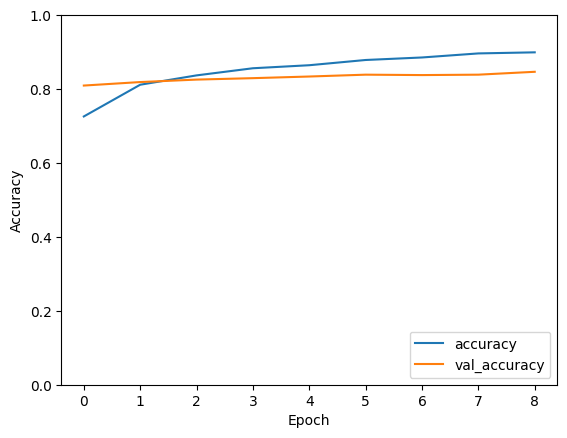

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
